In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/SENG 474/Assignment1/spambase_augmented.csv'
df = pd.read_csv(file_path)

In [4]:
print(df.head())

   0.000  0.640  0.640.1  0.000.1  0.320  0.000.2  0.000.3  0.000.4  0.000.5  \
0   0.21   0.28     0.50      0.0   0.14     0.28     0.21     0.07     0.00   
1   0.06   0.00     0.71      0.0   1.23     0.19     0.19     0.12     0.64   
2   0.00   0.00     0.00      0.0   0.63     0.00     0.31     0.63     0.31   
3   0.00   0.00     0.00      0.0   0.63     0.00     0.31     0.63     0.31   
4   0.00   0.00     0.00      0.0   1.85     0.00     0.00     1.85     0.00   

   0.000.6  ...  0.000.816  0.000.817  0.000.818  0.000.819  0.000.820  \
0     0.94  ...       0.00        0.0        0.0       0.00       0.00   
1     0.25  ...       0.06        0.0        0.0       0.12       0.06   
2     0.63  ...       0.00        0.0        0.0       0.00       0.00   
3     0.63  ...       0.00        0.0        0.0       0.00       0.00   
4     0.00  ...       0.00        0.0        0.0       0.00       0.00   

   0.000.821  0.000.822  0.000.823  0.000.824  1  
0       0.00       0.00

In [5]:
#now to split data into vectors
#each has 48 features of the frequency of some word
#this dataset has the original 57 features and a new feature for every pair of the 48 words and for any pair of words, the new feature is the sum of those words frequencies
#that means that there is 2^48 + 58 features? subract like pairs
#column asp is # 1186 so yea
#so vectors will be 1 * 1186 what the fuck



In [6]:
import numpy as np

np.shape(df)

(4600, 1186)

In [7]:

#split into training/test data  ***might be worth adding labels ie last col***
#maybe randomize later
#3640-> train
#960 -> test
'''
x = df.iloc[:,:-1] #features
y = df.iloc[:,-1] #label/last col

x_train = x[:3640]
y_train = y[:3640]
print(np.shape(x_train))
print(np.shape(y_train))

x_test = x[3640:]
y_test = y[3640:]
print(np.shape(x_test))
print(np.shape(y_test))
'''

'\nx = df.iloc[:,:-1] #features\ny = df.iloc[:,-1] #label/last col\n\nx_train = x[:3640]\ny_train = y[:3640]\nprint(np.shape(x_train))\nprint(np.shape(y_train))\n\nx_test = x[3640:]\ny_test = y[3640:]\nprint(np.shape(x_test))\nprint(np.shape(y_test))\n'

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x = df.iloc[:,:-1] #features
y = df.iloc[:,-1] #label/last col

In [10]:
print(x.shape)
print(y.shape)

(4600, 1185)
(4600,)


In [11]:
print(x.iloc[0])

0.000        0.21
0.640        0.28
0.640.1      0.50
0.000.1      0.00
0.320        0.14
             ... 
0.000.820    0.00
0.000.821    0.00
0.000.822    0.00
0.000.823    0.00
0.000.824    0.00
Name: 0, Length: 1185, dtype: float64


In [12]:
print(y.iloc[0])

1


In [13]:
x_train, x_temp, y_train, y_temp = train_test_split(x,y, train_size=0.6, random_state=0, shuffle=True)
x_validation, x_test, y_validation, y_test = train_test_split(x_temp, y_temp, test_size=0.2, random_state = 0, shuffle = True)

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)

(2760, 1185)
(2760,)
(1472, 1185)
(1472,)
(368, 1185)
(368,)


In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
import matplotlib.pyplot as plt

In [17]:
from sklearn.tree import plot_tree
from sklearn import tree

In [ ]:
#left child -> left_child_index = dtc.tree_.children_left[0]
#right child -> right_child_index = dtc.tree_.children_right[0]

In [18]:
import copy

Create mega tree <br>
Go through every node from the bottom <br>
at each node, remove it and it's children and compare the accuracy of the full tree with and without it <br>
record the accuracy(maybe regardless, would make life easier)<br>
Go until you reach the root node<br>
then find the tree with the greatest accuracy <br>

algo (node) :
Assuming you already have the accuracy measure for tree<br>
curr = node <br>
curr.left = null<br>
curr.right = null <br>
curr = null <br>

### should probably do it recursively but general idea is there I think -> for reduced error pruning

In [19]:
from sklearn import tree
from sklearn.base import clone

In [20]:
dtc = DecisionTreeClassifier(criterion="gini", random_state=0).fit(x_train, y_train)  # Exclude the target column name

In [ ]:
accuracy_before_pruning = dtc.score(x_test, y_test)
print("Accuracy before pruning:", accuracy_before_pruning)

Accuracy before pruning: 0.46195652173913043


In [21]:
def is_leaf(model, index):
  if ((model.tree_.children_left[index] == -1) & (model.tree_.children_right[index] == -1)) :
    return True
  else:
    return False

In [22]:
def prune_tree(model, index, x_value, y_value):
     # Base case: If the node is a leaf, do nothing
    if is_leaf(dtc, index):
      return

    #hold old values
    left_child = model.tree_.children_left[index]
    right_child = model.tree_.children_right[index]

    current_accuracy = model.score(x_value, y_value)


    prune_tree(model, left_child, x_value, y_value)
    prune_tree(model, right_child, x_value, y_value)

    #make them leaf nodes
    model.tree_.children_left[index] = -1
    model.tree_.children_right[index] = -1

    new_accuracy = model.score(x_value, y_value)

    #measure accuracy for changed tree

    if(new_accuracy < current_accuracy): #if pruning doesn't improve accuracy add children back
      model.tree_.children_left[index] = left_child
      model.tree_.children_right[index] = right_child

In [23]:
def print_model(model):
  plt.figure(figsize=(23, 23))
  plot_tree(model, filled=True)
  plt.show()

In [ ]:
node_count = dtc.tree_.node_count

for i in range(0, node_count):
  og_score = dtc.score(x_validation, y_validation)
  cloned = copy.deepcopy(dtc)
  prune_tree(cloned,i, x_validation, y_validation)
  new_score = cloned.score(x_validation, y_validation)
  if(og_score < new_score):
    cloned = dtc
    #if pruned tree is better or equal
    #keep pruned tree I guess
  if(og_score-new_score != 0):
    print(f"ORIGINAL ACCURACY: {og_score} NEW ACCURACY: {new_score} DIFFERENCE: {og_score-new_score}")

ORIGINAL ACCURACY: 0.828125 NEW ACCURACY: 0.9184782608695652 DIFFERENCE: -0.09035326086956519
ORIGINAL ACCURACY: 0.828125 NEW ACCURACY: 0.8858695652173914 DIFFERENCE: -0.05774456521739135
ORIGINAL ACCURACY: 0.828125 NEW ACCURACY: 0.8804347826086957 DIFFERENCE: -0.052309782608695676
ORIGINAL ACCURACY: 0.828125 NEW ACCURACY: 0.8722826086956522 DIFFERENCE: -0.04415760869565222
ORIGINAL ACCURACY: 0.828125 NEW ACCURACY: 0.8403532608695652 DIFFERENCE: -0.012228260869565188
ORIGINAL ACCURACY: 0.828125 NEW ACCURACY: 0.8403532608695652 DIFFERENCE: -0.012228260869565188
ORIGINAL ACCURACY: 0.828125 NEW ACCURACY: 0.8396739130434783 DIFFERENCE: -0.01154891304347827
ORIGINAL ACCURACY: 0.828125 NEW ACCURACY: 0.8383152173913043 DIFFERENCE: -0.010190217391304324
ORIGINAL ACCURACY: 0.828125 NEW ACCURACY: 0.8355978260869565 DIFFERENCE: -0.007472826086956541
ORIGINAL ACCURACY: 0.828125 NEW ACCURACY: 0.8322010869565217 DIFFERENCE: -0.0040760869565217295
ORIGINAL ACCURACY: 0.828125 NEW ACCURACY: 0.831521739

In [ ]:
prune_tree(dtc, 10, x_validation, y_validation)
accuracy_after_pruning = dtc.score(x_test, y_test)

In [ ]:
accuracy_after_pruning = dtc.score(x_test, y_test)

In [ ]:
print(f"ACCURACY BEFORE PRUNING IS {accuracy_before_pruning} \nACCURACY AFTER PRUNING IS {accuracy_after_pruning}")

ACCURACY BEFORE PRUNING IS 0.46195652173913043 
ACCURACY AFTER PRUNING IS 0.6494565217391305


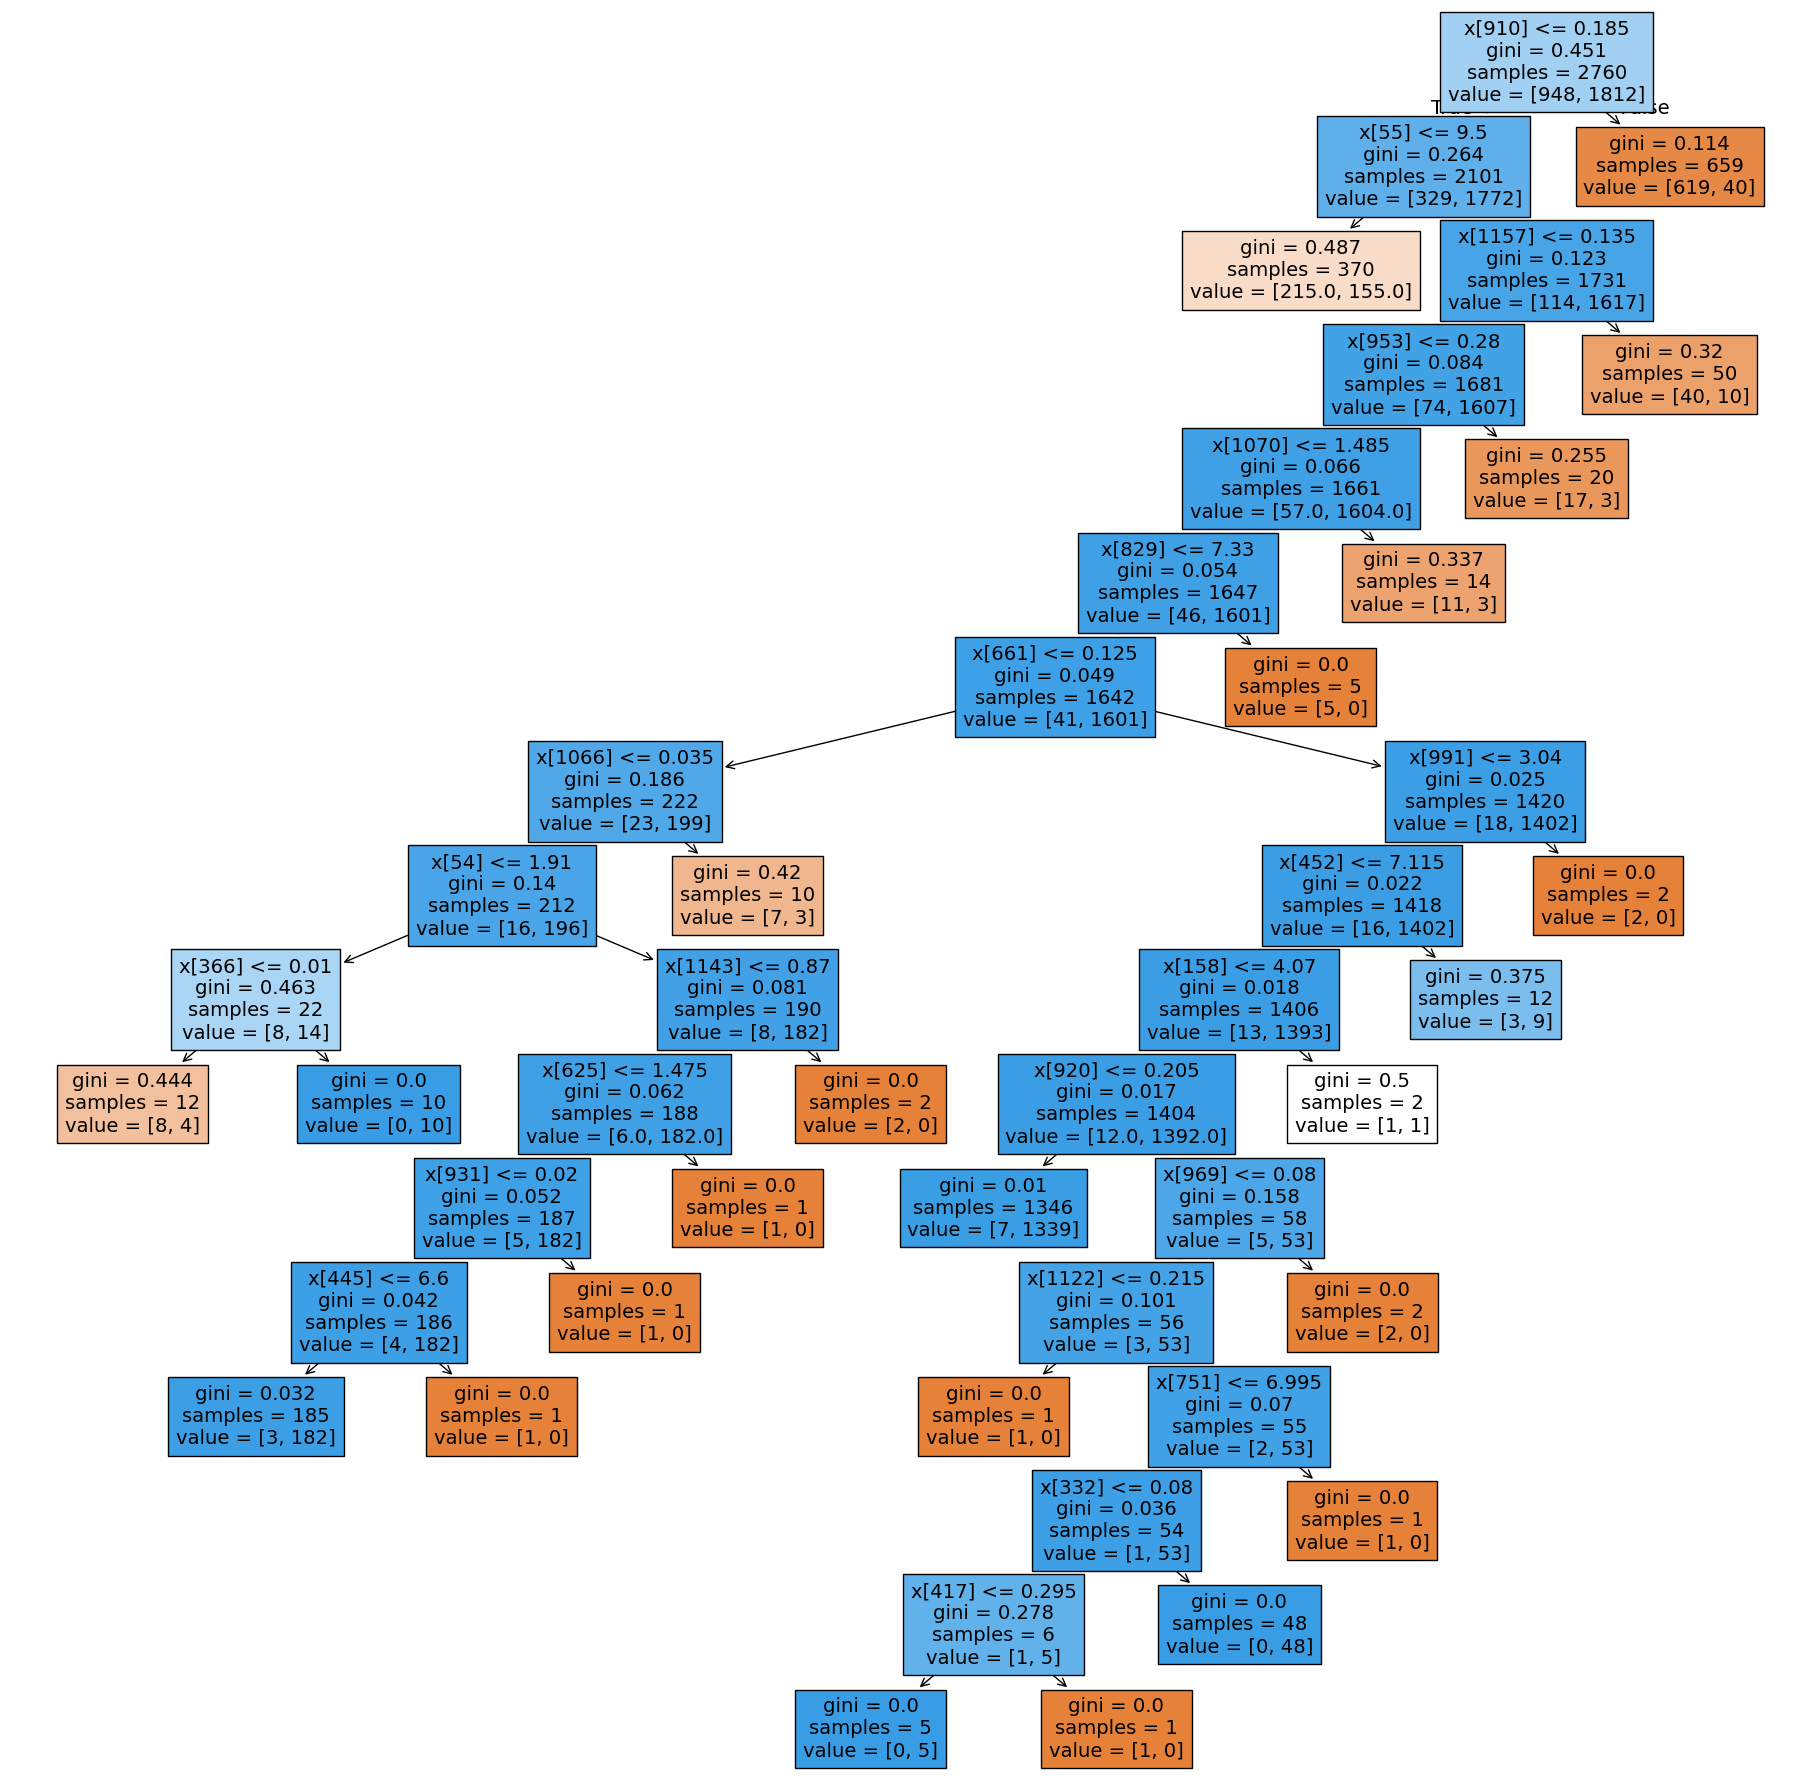

In [ ]:
print_model(dtc)